## Part 1
Write a Python function that takes N as an input and returns the matrix A and vector f.

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix

def wave_discretised(N):
    """Generate the matrix and rhs associated with
    he discrete Poisson operator."""

    '''
    input:
    - N (number of discrete point)

    output:
    - crs_matrix (matrix of the simultaneous equation)
    - f (the vector for the value on the RHS of simultaneous equation)
    '''
    # storage variable
    rows = []
    columns = []
    Coef = []

    f = np.empty(N+1 , dtype=np.float64)

    # defining constant
    k = 29 *np.pi/2
    h=1/N

    # coefficient of the matrix
    diagonal = 2 - ((h)**2) * k**2
    off_diagonal = -1


    # assigning the index (row,column) with their corresponding coefficient
    for i in range(0,N):
        if i+1 <= N and i-1 >=0:
          rows.append(i)
          columns.append(i)
          Coef.append(diagonal)

          rows.append(i)
          columns.append(i+1)
          Coef.append(off_diagonal)

          rows.append(i)
          columns.append(i-1)
          Coef.append(off_diagonal)

          f[i]=0

    # Boundary Condition
    rows.append(0)
    columns.append(0)
    Coef.append(1)
    f[0] = 0

    rows.append(N)
    columns.append(N)
    Coef.append(1)
    f[N] = 1

    row_ind = np.array(rows)
    col_ind = np.array(columns)
    Coef = np.array(Coef)

    csr_matrix=coo_matrix((Coef, (row_ind, col_ind)), shape=(N+1, N+1)).tocsr()

    return csr_matrix, f



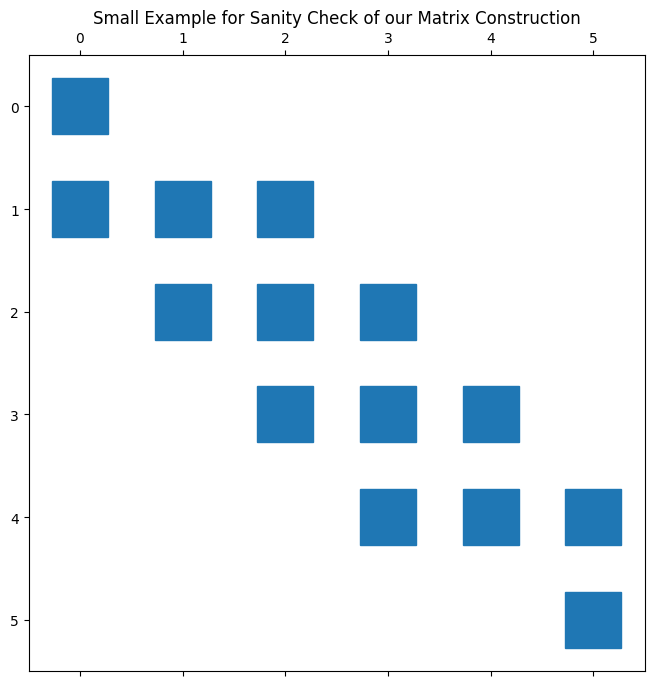

In [ ]:
# Plot small value of N=5 to check if the code function correctly
import matplotlib.pyplot as plt
A, f = wave_discretised(5)


plt.figure(figsize=(8, 8))
plt.title("Small Example for Sanity Check of our Matrix Construction")
plt.spy(A,markersize=40)

In [ ]:
print(A.data)
print(A.indices)
print(A.indptr)


[  1.          -1.         -81.00337301  -1.          -1.
 -81.00337301  -1.          -1.         -81.00337301  -1.
  -1.         -81.00337301  -1.           1.        ]
[0 0 1 2 1 2 3 2 3 4 3 4 5 5]
[ 0  1  4  7 10 13 14]


### Comment on the format of the Matrix
As shown above, we have represented the matrix in the Compressed Sparse Row containing 3 arrays which are data, indices, index pointer arrays respectively.

## Next task
The function scipy.sparse.linalg.spsolve can be used to solve a sparse matrix-vector problem. Use this to compute the approximate solution for your problem for N=10, N=100, and N=1000. Use matplotlib (or any other plotting library) to plot the solutions for these three values of N.

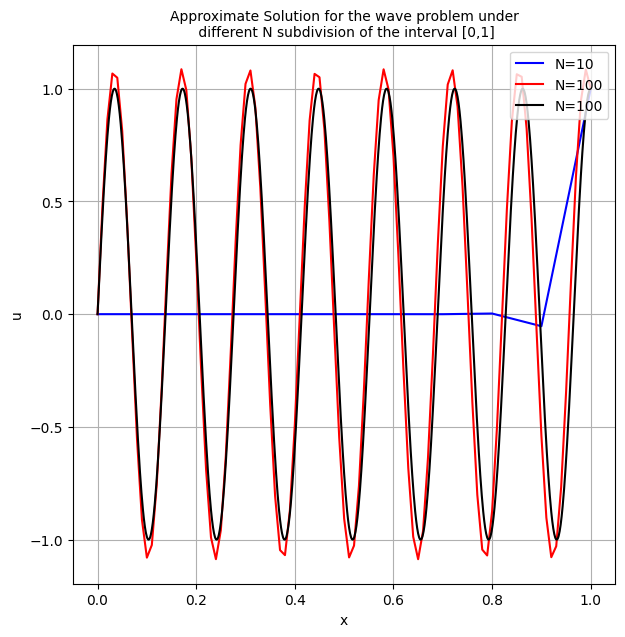

In [ ]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from scipy.sparse.linalg import spsolve

# Creating storage variable for plotting
N = [10,100,1000]
u = []
interval_x = []

# computing the approximate solution for different N
for i in N:
    A, f = wave_discretised(i)
    u.append(spsolve(A, f))
    interval = np.linspace(0,1,i+1)
    interval_x.append(interval)




# Plot the aprroximate solution for different values of N
fig,ax=plt.subplots(figsize=(7,7))



ax.plot(interval_x[0],u[0],color='blue',label='N=10')
ax.plot(interval_x[1],u[1],color='red',label='N=100')
ax.plot(interval_x[2],u[2],color='black',label='N=100')
ax.set_title('''Approximate Solution for the wave problem under
 different N subdivision of the interval [0,1]''',fontsize=10)
ax.set_xlabel("x")
ax.set_ylabel('u')
ax.legend(loc='upper right')
ax.grid()


## Question
Briefly (1-2 sentences) comment on your plots: How different are they from each other? Which do you expect to be closest to the actual solution of the wave problem?

## Comment
We see a larger different between the N=10 & N=100 approximate solution compared to the difference between the N=100 & N=100 approximate solution, this is because the value of N determines the number of discrete point within the interval [0,1] of x. We will expect the N=1000 approximate solution to be closest to the actual solution as the interval [0,1] is subdivided into the most number of N subidivision leading to a more accurately representation of differential as the concept of differential is based on infintesimal change.

## Next task
Compute this error for a range of values for 𝑁 of your choice, for the method you wrote above. On axes that both use log scales, plot 𝑁 against the error in your solution. You should pick a range of values for 𝑁 so that this plot will give you useful information about the methods.



In [ ]:
interval_x = []
errors = []
k = 29 *np.pi/2
N_interval = np.arange(10,1300000,3000)

# computing the error of the approximate solution
for i in N_interval:
    A, f = wave_discretised(i)
    u_i = spsolve(A, f)
    interval = np.linspace(0,1,i+1)
    interval_x.append(interval)

    Exact = np.sin(k*interval)

    errors_p = np.max(abs(u_i - Exact))
    errors.append(errors_p)
errors_np = np.array(errors)
print(errors_np.shape)

(434,)


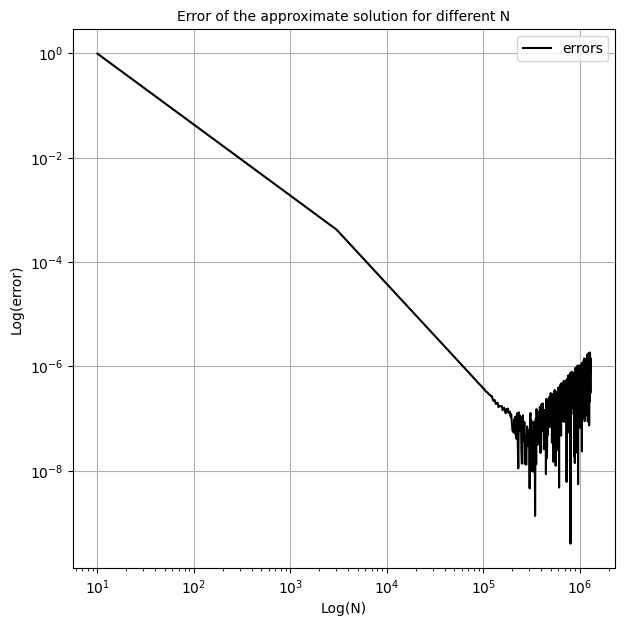

In [ ]:
# Plot the aprroximate solution for different values of N
fig,ax=plt.subplots(figsize=(7,7))

ax.plot(N_interval,errors,color='black',label='errors')
ax.set_title("Error of the approximate solution for different N",fontsize=10)
ax.set_xlabel("Log(N)")
ax.set_ylabel('Log(error)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='upper right')
ax.grid()

## Next Task
For the same values of 𝑁, measure the time taken to compute your approximation for your function. On axes that both use log scales, plot 𝑁 against the time taken to compute a solution.

In [ ]:
from timeit import timeit

# creating a list to store the computational time
Time=[]


for n in N_interval:

    A,f = wave_discretised(n)

    # Computing the approximate solution
    # store the time taken for the computation
    t = timeit('spsolve(A, f) ',globals=globals(),number=1)

    Time.append(t)

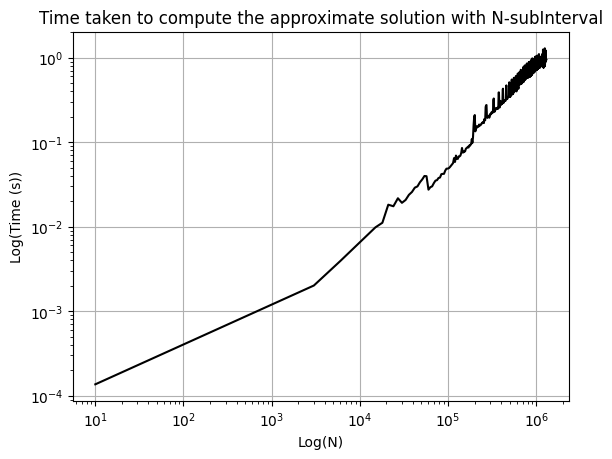

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


fig,ax=plt.subplots()



ax.plot(N_interval,Time,color='black')
ax.set_title("Time taken to compute the approximate solution with N-subInterval")
ax.set_ylabel("Log(Time (s))")
ax.set_xlabel('Log(N)')
ax.set_yscale('log')
ax.set_xscale('log')

ax.grid()

## Question
We now want to compute an approximate solution where the error measure is $10^{−8}$or less. By looking at your plots, pick a value of 𝑁 that you would expect to give error of $10^{−8}$ or less. Briefly (1-2 sentences) explain how you picked your value of 𝑁 and predict how long the computation will take.

## Comment
By looking at my graph of Log(error) vs Log(N), I expect 50,0000 < N < 100,000 would give an error of $10^{-8}$ or less. Since there is a linear relationship between the Log(error) and Log(N) between the interval N = $[10^{4},10^{5}]$ , we can extrapolate the data to find the value of N when the error of $10^{-8}$ is achieved. Similar method can be apply to predict the computational time.

The equation used to estimate N is:

$log(err_2) - log(err_1) = m (log(N_2)-log(N_1)) $

>
$N_2 = e^{ (log(err_2) - log(err_1))/m + log(N_1)}$


The equation used to estimate t is:
>
$ t = e^{mlog(N)+c}$
>
where N is our estimated N and m (gradient) and c (y-intercept) can be found using the np.polyfit function.

In [ ]:
# We observe that the linearity is stable within the interval of N [10^4, 10^5]
# hence we can extrapolate the data using this gradient

N_interval = np.arange(10,1300000,3000)
N_i = []
index = []


for i in range(len(N_interval)):
    if N_interval[i]>=10**4 and N_interval[i]<=10**5:
        index.append(i)
        N_i.append(N_interval[i])


# finding gradient within the interval of interest
# taking the difference between the first value and last value of the interval

delta_y = np.log(errors_np[index[-1]]) - np.log(errors_np[index[0]])
delta_x = (np.log(N_i[-1]) - np.log(N_i[0]))
grad = delta_y / delta_x

# N_2 is the approximate value of N which we have an error below 10^{-8}
N_2 = np.exp( (1/grad)*(np.log(10**-8) - np.log(errors_np[index[0]])
              + (grad * np.log(N_i[0]))))

print("Estimate N =",int(N_2), "with error less than 10^-8")


Estimate N = 607364 with error less than 10^-8


In [ ]:
# We can interpolate the data within the range [3000,10^6] to estimate t
# since the linearity is quite consistent through the range
# we can use polyfit function to estimate the linear function that fits the plot

time_m, time_c = np.polyfit(np.log(N_interval[1:]),np.log(Time[1:]),1)

estimate_t = np.exp(time_m * np.log(N_2) + time_c)
estimate_t_3dp = round(estimate_t,3)
print("Estimate Computation Time is ",estimate_t_3dp,"s")
# After obtaining the gradient and y-intercept, we can estimate time



Estimate Computation Time is  0.443 s


## Next Task
Compute the approximate solution with your value of 𝑁. Measure the time taken and the error, and briefly (1-2 sentences) comment on how these compare to your predictions

In [ ]:
# finding the approximate wave solution's error and computational time
# and then compare it with our prediction
est_A, est_f = wave_discretised(int(N_2))
u_i_estimate_N = spsolve(est_A, est_f)

interval = np.linspace(0,1,607364+1)
Exact = np.sin(k*interval)

actual_error = np.max(abs(u_i_estimate_N - Exact))
actual_time = timeit('spsolve(est_A, est_f) ',globals=globals(),number=1)
actual_time_3dp = round(actual_time,3)
print('The actual error of our predicted N is',actual_error)
print('The actual computational time for our predicted N is',actual_time_3dp,'s')
print('')
print('''The difference between our estimated computational time and actual time
is''', round(actual_time_3dp - estimate_t_3dp,4),'s')

The actual error of our predicted N is 3.855115648550289e-07
The actual computational time for our predicted N is 0.456 s

The difference between our estimated computational time and actual time
is 0.013 s


## Question
Briefly (1-2 sentences) comment on how these compare to your predictions.

## Comment
It is great that our estimated computational time is actually very close (0.013s difference) to the actual computational time. However, the actual error is higher than the error we have predicted for the estimated N. The reason for this is because of the huge fluctuation in error and the error's trend begins to increase after N > 500,000 which might be due to machine precision (float32 has a machine precision of $1.2×10^{−7}$) starting to dominant & accumulate as N increases which naturally increases the error within our calculation.

# Part 2: Solving Heat Equation with GPU acceleration

Implement this iterative scheme in Python.

In [ ]:
import numpy as np
def heat_eqn_rod(N,t):
    '''
    Solve heat equation along a 1D metal rod'

    Input:
    - N (N subdivision for discretisation)
    - t (time parameter for the system)

    Output:
    - solution of the heat equation
    '''

    h = 1/N

    # Discretising the time into N subinterval
    dt = N*t

    # Solution storage
    u = np.zeros((1+dt,N+1)) # add 1 to account for the 0th index

    # Encoding the Boundary Condition
    u[:,-1] = u[:,0]=10

    # updating the temperature of the rod using the iterative method, we
    # explicitly did not update the boundary condition as it is fixed at temp=10
    for j in range(dt):
        u[j+1,1:N]=u[j,1:-1]+(1/(1000*h))*(u[j,0:-2] - 2 * u[j,1:-1] + u[j,2:])
    return u


## Next Task
Using a sensible value of 𝑁, plot the temperature of the rod at 𝑡=1, 𝑡=2 and 𝑡=10. Briefly (1-2 sentences) comment on how you picked a value for 𝑁.

In [ ]:
N=500
# x interval discretised by N points
x_P2 = np.linspace(0,1,N+1)

# Solution for different t

Heat_sol_t1 = heat_eqn_rod(N,1)[-1,:]
Heat_sol_t2 = heat_eqn_rod(N,2)[-1,:]
Heat_sol_t10 = heat_eqn_rod(N,10)[-1,:]


## Comment on choosing N
The iterative scheme is a based on the perturbative second term which updates the previous term $u^{(j)}_{i}$ to the next term $u^{(j+1)}_{i}$, therefore to avoid this perturbative second term from dominating over the first term $u^{(j)}_{i}$, we should choose a value of N < 1000. However, N should not be too small as it determines how finely we discretise the interval of x which is important for resembling a continuous temperature of the rod as well as a more accurate representation of the idea of infinitesimal change. Therefore, we choose a value of N=500 to avoid the two extreme cases highlighted.

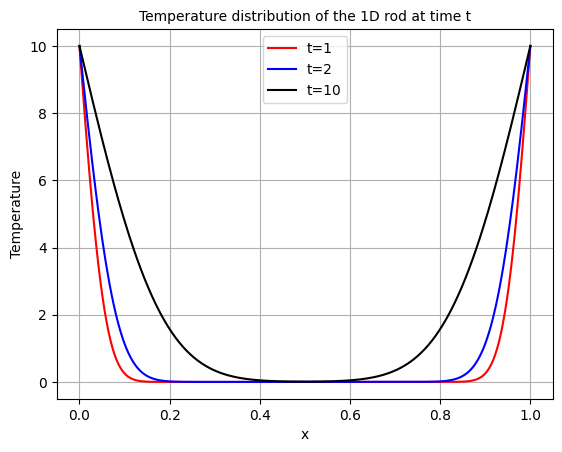

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plotting the temperature distribution of the 1D rod at time t=1,2,10
fig,ax=plt.subplots()



ax.plot(x_P2,Heat_sol_t1,color='red',label='t=1')
ax.plot(x_P2,Heat_sol_t2,color='blue',label='t=2')
ax.plot(x_P2,Heat_sol_t10,color='black',label='t=10')
ax.set_title("Temperature distribution of the 1D rod at time t",fontsize=10)
ax.set_ylabel("Temperature")
ax.set_xlabel('x')

ax.legend()
ax.grid()

## Next Task
Use numba.cuda to parallelise your implementation on a GPU. You should think carefully about when data needs to be copied and be careful not to copy data to/from the GPU when not needed.

In [ ]:
import scipy
import numpy as np
import numba
from numba import cuda
import math
# checking our GPU specification
cuda.detect()

Found 1 CUDA devices
id 0             b'Tesla T4'                              [SUPPORTED]
                      Compute Capability: 7.5
                           PCI Device ID: 4
                              PCI Bus ID: 0
                                    UUID: GPU-4feaca38-bf6c-220d-4b16-8eb3361f77f4
                                Watchdog: Disabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

In [ ]:
@cuda.jit

def heat_eqn_rod_GPU(N,j,u):
  """
  Utilising GPU to implement the iterative scheme to solve
  the Heat Eqn for the rod


  Inputs:
  - N (Discretisation parameter)
  - j (index for the discretised time points)
  - u (solution which is required as an input because GPU can't check variable)

  Output:
  - u (solution of the system at time t)
  """
  # thread address
  i = cuda.grid(1)
  h = 1/N


  # Setting a guard to check that the thread is within N
  if (i>0 and i<N):
    # since we are essentially looping through i due to present of thread
    # we do not need to index the u variable as we did previously i.e. u[j,0:-1]
    u[j+1,i]=u[j,i]+(1/(1000*h))*(u[j,i-1] - 2 * u[j,i] + u[j,i+1])

  else:
    pass

In [ ]:
# checking if our implementation is actually functioning as we expect to

# Setting constant
N = 500
t = 10
dt = N*t

# storage for the solution

u_GPU = np.zeros((dt+1,N+1), dtype=np.float64)
u_GPU[:,-1] = u_GPU[:,0] = 10

# we find the grid-dimension required for this problem using the equation
# grid-dimension = N / (block-dimension)
blockdim = 254
griddim = int(np.ceil(N/blockdim))
u_GPU = cuda.to_device(u_GPU)

for j in range(dt):
  heat_eqn_rod_GPU[griddim,blockdim](N,j,u_GPU)

u_GPU = u_GPU.copy_to_host()

In [ ]:
# Check if the GPU implementation give the same result as the previous CPU one
# we have t=10
assert np.allclose(u_GPU, heat_eqn_rod(N,10))

## Comment on the validity of our GPU implementation
The GPU implementation of our heat equantion seems like it is giving the same result as our previous CPU implementation.

## Next Task
Use your code to estimate the time at which the temperature of the midpoint of the rod first exceeds a temperature of 9.8.

In [ ]:
# checking if our implementation is actually functioning as we expect to

# Setting constant
N = 500
t_est = 500
dt_est = N*t_est

h=1/N

N_mid = N//2
# storage for the solution

u_GPU_est = np.zeros((dt_est+1,N+1), dtype=np.float64)
u_GPU_est[:,-1] = u_GPU_est[:,0] = 10

blockdim = 256
griddim = int(np.ceil(N/blockdim))
u_GPU_est = cuda.to_device(u_GPU_est)

for j in range(1,dt_est):
  heat_eqn_rod_GPU[griddim, blockdim](N,j,u_GPU_est)

u_GPU_est = u_GPU_est.copy_to_host()

# Determining the time at which Temp of midpoint exceeds 9.8
u_GPU_mid = np.array(u_GPU_est[:,N_mid])
time_est = np.argmax(u_GPU_mid>9.8) *h

print("The rod's midpoint first exceeds temperature of 9.8 at t=",time_est,'s')



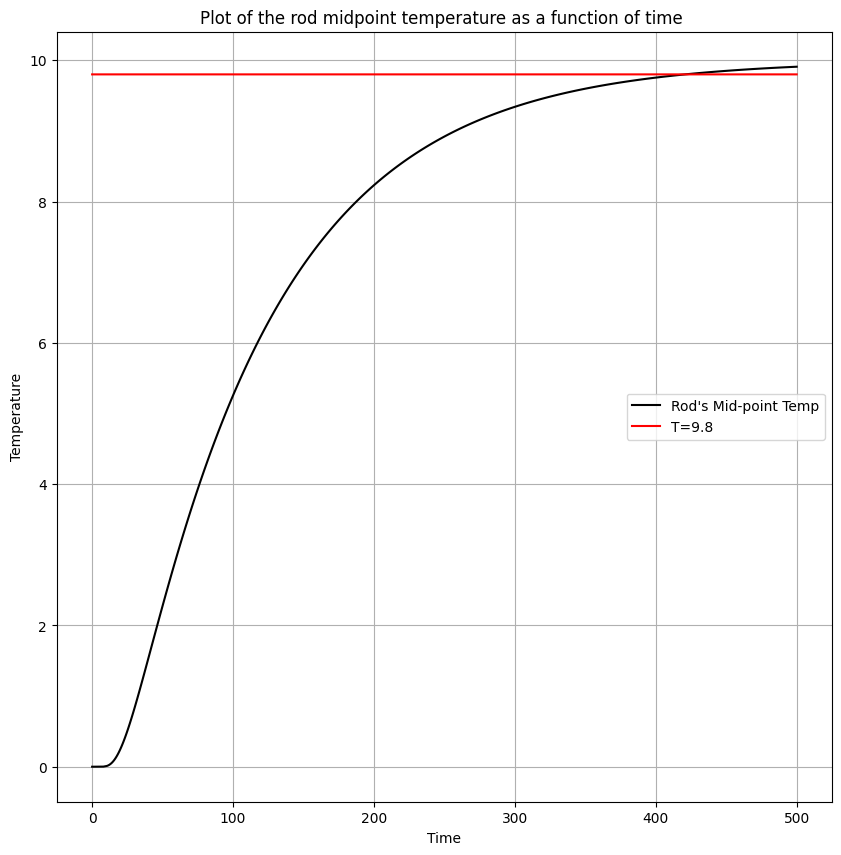

In [ ]:
# Plotting rod midpoint temperature for different times to verify result
fig8 = plt.figure(figsize=(10,10))
ax1 = fig8.add_subplot(111)
N=500


# x is the time axis
x = np.arange(0,dt_est+1,1) / N
# y is the temperature of the rod's midpoint & the Temp = 9.8 mark
y_Mid_temp = u_GPU_mid
y_mark = 9.8 * np.ones(dt_est+1)

ax1.plot(x,y_Mid_temp,label='''Rod's Mid-point Temp''',color='black')

ax1.plot(x,y_mark,label='T=9.8',color='red')

ax1.set_title('Plot of the rod midpoint temperature as a function of time ')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature')

ax1.legend(loc='right')
ax1.grid()
plt.show()

## Question
Briefly (2-3 sentences) describe how you estimated this time. You may choose to use a plot or diagram to aid your description, but it is not essential to include a plot.

## Comment
Using our iterative Scheme with N=500, we estimate that the time the rod's midpoint first exceeds the temperature of 9.8 is $t=420.8$. This is accomplished via finding the temperature at the rod's mid point $N_{mid}$ for all time t from 0 to 500 and then use np.argmax to find the position of the time array where the temperature at $N_{mid}$ first exceeds 9.8. Finally, we divide this position by N to find the actual time. By plotting the graph of the rod's midpoint temperature as a function of time, we see that the rod's midpoint temperature first exceeds temperature of 9.8 at around 420 which give a supportive evidence for our estimation.